In [252]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn
%matplotlib inline  

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [253]:
def generate_output(Y_pred, filename):
    df_output = pd.DataFrame()
    aux = pd.read_csv('Data/test.csv')
    df_output['PassengerId'] = aux['PassengerId']
    df_output['Survived'] = Y_pred
    df_output[['PassengerId','Survived']].to_csv(filename + '.csv',index=False)

In [254]:
def get_title(df):
    df['Title']=df['Name'].apply(lambda x: extract_title(x))
    for title in df['Title'].unique():
        df.set_value(df[df['Title']==title].index,'Age',df[df['Title']==title]['Age'].fillna(df[df['Title']==title]['Age'].median()))
    return df

In [255]:
def feature_enginer(df):
    df=process_sex(df)
    df=process_age(df)
    df=process_fare(df)
    df=process_title(df)
    df=process_pclass(df)
    df=process_embarked(df)
    df=df.drop(['Cabin'], axis=1)
    df=df.drop(['Ticket'], axis=1)
    df=df.drop(['PassengerId'], axis=1)
    return df

In [256]:
def extract_title(x):
    """Get the person's title from their name. Combine reduntant or less common 
    titles together.
    """
    title = x.split(',')[1].split('.')[0][1:]
    if title in ['Mlle', 'Ms']:
        title = 'Miss'
    elif title == 'Mme':
        title = 'Mrs'
    elif title in ['Rev', 'Dr', 'Major', 'Col', 'Capt', 'Jonkheer', 'Dona']:
        title = 'Esteemed'
    elif title in ['Don', 'Lady', 'Sir', 'the Countess']:
        title = 'Royalty'
    return title

In [257]:
def process_sex(df):
    df['Sex'] = df['Sex'].map({'male':0, 'female':1})
    return df

In [258]:
def process_age(df):
    df['Age'] = df['Age'].apply(lambda x: (x - df['Age'].min()) / (df['Age'].max() - df['Age'].min()))
    return df

In [259]:
def process_fare(df):
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Fare'] = df['Fare'].apply(lambda x: (x - df['Fare'].min()) / (df['Fare'].max() - df['Fare'].min()))
    return df

In [260]:
def process_title(df):
    df=df.drop(['Name'], axis=1)
    titles_dummies = pd.get_dummies(df['Title'],prefix='Title')
    df = pd.concat([df,titles_dummies],axis=1)
    df=df.drop(['Title'], axis=1)
    return df

In [261]:
def process_pclass(df):
    titles_dummies = pd.get_dummies(df['Pclass'],prefix='Pclass')
    df = pd.concat([df,titles_dummies],axis=1)
    df=df.drop(['Pclass'], axis=1)
    return df


In [262]:
def process_embarked(df):
    df['Embarked'].fillna('S', inplace=True)
    titles_dummies = pd.get_dummies(df['Embarked'],prefix='Embarked')
    df = pd.concat([df,titles_dummies],axis=1)
    df=df.drop(['Embarked'], axis=1)
    return df

In [263]:
df_train = pd.read_csv('Data/train.csv')
df_test = pd.read_csv('Data/test.csv')

In [264]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [265]:
df_train=get_title(df_train)
df_test = get_title(df_test)

In [266]:
'''
sex_survivors = df_train[df_train['Survived']==1]['Sex'].value_counts()
sex_nsurvivors = df_train[df_train['Survived']==0]['Sex'].value_counts()

plt.figure(figsize=(15,5))
ind = np.arange(len(sex_survivors))    
bar_width = 0.35       # the width of the bars: can also be len(x) sequence
rects1 = plt.bar(ind, sex_survivors.tolist(), bar_width, color='g', label='Survivals')
rects2 = plt.bar(ind + bar_width, sex_nsurvivors.tolist(), bar_width, color='r', label='Not Survivals')
plt.legend()
plt.xticks(ind + bar_width, sex_survivors.index.tolist())
'''

"\nsex_survivors = df_train[df_train['Survived']==1]['Sex'].value_counts()\nsex_nsurvivors = df_train[df_train['Survived']==0]['Sex'].value_counts()\n\nplt.figure(figsize=(15,5))\nind = np.arange(len(sex_survivors))    \nbar_width = 0.35       # the width of the bars: can also be len(x) sequence\nrects1 = plt.bar(ind, sex_survivors.tolist(), bar_width, color='g', label='Survivals')\nrects2 = plt.bar(ind + bar_width, sex_nsurvivors.tolist(), bar_width, color='r', label='Not Survivals')\nplt.legend()\nplt.xticks(ind + bar_width, sex_survivors.index.tolist())\n"

In [267]:
'''
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
df_aux=df_train[df_train['Survived']==1]
plt.hist(df_aux[df_aux['Sex']=='male']['Age'], histtype='step', bins=30, color='b', label='male')
plt.hist(df_aux[df_aux['Sex']=='female']['Age'],  histtype='step', bins=30, color='r', label='female')
plt.legend()

plt.title('Survivals')
plt.subplot(1,2,2)
df_aux=df_train[df_train['Survived']==0]
plt.hist(df_aux[df_aux['Sex']=='male']['Age'],  histtype='step', bins=30, color='b', label='male')
plt.hist(df_aux[df_aux['Sex']=='female']['Age'], histtype='step', bins=30, color='r', label='female')
plt.title('Not Survivals')
plt.legend()
'''

"\nplt.figure(figsize=(20,5))\nplt.subplot(1,2,1)\ndf_aux=df_train[df_train['Survived']==1]\nplt.hist(df_aux[df_aux['Sex']=='male']['Age'], histtype='step', bins=30, color='b', label='male')\nplt.hist(df_aux[df_aux['Sex']=='female']['Age'],  histtype='step', bins=30, color='r', label='female')\nplt.legend()\n\nplt.title('Survivals')\nplt.subplot(1,2,2)\ndf_aux=df_train[df_train['Survived']==0]\nplt.hist(df_aux[df_aux['Sex']=='male']['Age'],  histtype='step', bins=30, color='b', label='male')\nplt.hist(df_aux[df_aux['Sex']=='female']['Age'], histtype='step', bins=30, color='r', label='female')\nplt.title('Not Survivals')\nplt.legend()\n"

In [268]:
df_train=feature_enginer(df_train)
target=df_train['Survived']
df_train=df_train.drop(['Survived'], axis=1)
df_test=feature_enginer(df_test)

In [269]:
df_col = list(set(df_test.columns.tolist()) ^ set(df_train.columns.tolist()))
for col in df_col:
    df_test[col] = 0

In [270]:
df_train.head()

,Sex,Age,SibSp,Parch,Fare,Title_Esteemed,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Royalty,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,0.271174,1,0,0.014151,0,0,0,1,0,0,0,0,1,0,0,1
1,1,0.472229,1,0,0.139136,0,0,0,0,1,0,1,0,0,1,0,0
2,1,0.321438,0,0,0.015469,0,0,1,0,0,0,0,0,1,0,0,1
3,1,0.434531,1,0,0.103644,0,0,0,0,1,0,1,0,0,0,0,1
4,0,0.434531,0,0,0.015713,0,0,0,1,0,0,0,0,1,0,0,1


In [271]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(df_train, target)
Y_pred_forest = clf.predict(df_test)

In [272]:
kmean = KNeighborsClassifier()
kmean.fit(df_train, target)
Y_pred_kmean = kmean.predict(df_test)

In [273]:
gnb = GaussianNB()
gnb.fit(df_train, target)
Y_pred_gnb = gnb.predict(df_test)

In [274]:
svc = LinearSVC()
svc.fit(df_train, target)
Y_pred_svc = svc.predict(df_test)

In [275]:
logreg = LogisticRegression()
logreg.fit(df_train, target)
Y_pred_logreg = logreg.predict(df_test)

In [276]:
y_aux = np.column_stack((Y_pred_svc.tolist(), Y_pred_logreg.tolist(), Y_pred_gnb.tolist(), Y_pred_kmean.tolist()))
y_merge = []
for line in y_aux:
    counts = np.bincount(line)
    y_merge.append(np.argmax(counts))

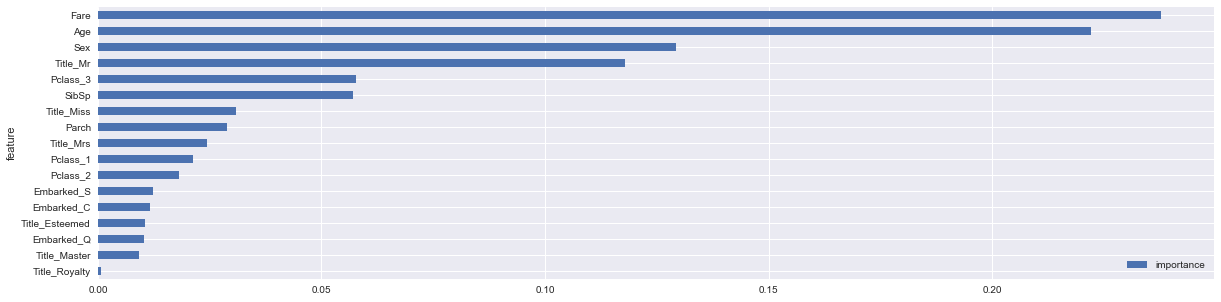

In [277]:
features = pd.DataFrame()
features['feature'] = df_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(20, 5))

In [278]:
generate_output(y_merge, 'output_ensemble')